In [2]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [3]:
%%R

library(tidyverse)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('./2018_padro_nacionalitat_per_sexe.csv')

head(barris)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_double(),
  Codi_Districte = col_double(),
  Nom_Districte = col_character(),
  Codi_Barri = col_double(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_double()
)

  warnings.warn(x, RRuntimeWarning)


# A tibble: 6 x 8
    Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri Sexe  Nacionalitat
  <dbl>          <dbl> <chr>              <dbl> <chr>     <chr> <chr>       
1  2018              1 Ciutat Vella           1 el Raval  Home  Espanya     
2  2018              1 Ciutat Vella           2 el Barri… Home  Espanya     
3  2018              1 Ciutat Vella           3 la Barce… Home  Espanya     
4  2018              1 Ciutat Vella           4 Sant Per… Home  Espanya     
5  2018              2 Eixample               5 el Fort … Home  Espanya     
6  2018              2 Eixample               6 la Sagra… Home  Espanya     
# … with 1 more variable: Nombre <dbl>


In [16]:
%%R

dim(barris)

[1] 7446    8


In [19]:
%R -o barris

In [6]:
%%R

# Let's manually convert a few columns into factors. 
filterer=barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL)) %>%
            filter((Nom_Barri=="el Poblenou") &(Nacionalitat!="Espanya"))%>%
            group_by(Nacionalitat) %>%
            summarize(num=sum(Nombre)) %>%
            top_n(10,num) %>%
            ungroup() %>%
            mutate(filtered=1)

filterer

#barris %>% left_join(filter,by="Nacionalitat")
a=barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL)) %>%
            filter((Nom_Barri=="el Poblenou") &(Nacionalitat!="Espanya"))%>%
            group_by(Nacionalitat) %>%
            mutate(num=sum(Nombre)) %>%
            ungroup %>%
            top_n(10,num)

a[,c("Nacionalitat","num")]

# A tibble: 10 x 2
   Nacionalitat            num
   <fct>                 <dbl>
 1 Itàlia                 1017
 2 França                  479
 3 Resta països d'Europa   323
 4 Xina                    395
 5 Pakistan                359
 6 Itàlia                 1017
 7 França                  479
 8 Resta països d'Europa   323
 9 Xina                    395
10 Pakistan                359


In [26]:
type(barris)

rpy2.robjects.vectors.DataFrame

In [35]:
import pandas as pd

from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

df=localconverter.ri2py(barris)


df["Total"]=df.groupby(['Nacionalitat']).sum('Nombre')

AttributeError: type object 'ConversionContext' has no attribute 'ri2py'

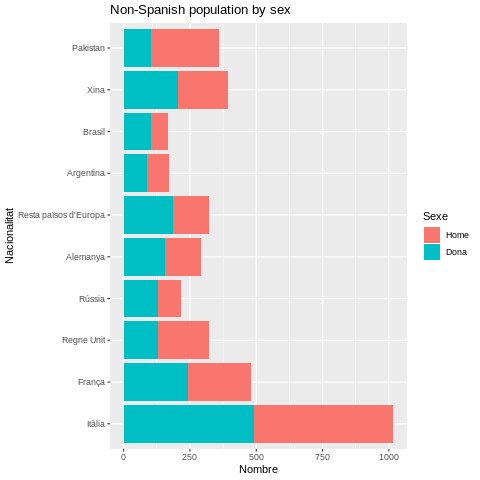

In [7]:
%%R

# Let's manually convert a few columns into factors. 
barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL)) %>%
            filter((Nom_Barri=="el Poblenou") &(Nacionalitat!="Espanya"))%>%


            group_by(Nacionalitat) %>%
            mutate(num=sum(Nombre)) %>%
            ungroup %>%
            top_n(20,num) %>%
            group_by(Nacionalitat,Sexe)%>%

            ggplot(aes(x=Nacionalitat,y=Nombre,fill=Sexe))+
            geom_col()+
            coord_flip()+
            ggtitle("Non-Spanish population by sex")

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#

# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

# Problem 3: Classes in Python

In [8]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

class RandomClassifier:
    
    def __init__(self, probability):
        self.probability = probability
    
    def predict(self,x):
        if np.random.uniform(0,1,1) < self.probability:
            return 1
        else:
            return 0

In [9]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)



# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

In [10]:
%%latex
\begin{align}
\alpha^2
\end{align}

<IPython.core.display.Latex object>

### What is lazy evaluation and when might you use it? (2-3 lines)

In [11]:
%%latex
This is my answer.

<IPython.core.display.Latex object>

In [12]:
%%markdown
This is my answer.

This is my answer.


In [13]:
%%latex
\begin{align}
\alpha^2
\end{align}


<IPython.core.display.Latex object>

In [14]:
print('Hello')

Hello
